<h1 style="text-align: center;">Introduction to Data Science - Assignment 7</h1>
<h3 style="text-align: center;">Name: Hugo Hayashi</h3>
<h3 style="text-align: center;">Student ID: 22446441</h3>



## Question 1


[0.16724, 0.16842, 0.16612, 0.16528, 0.16508, 0.16786]


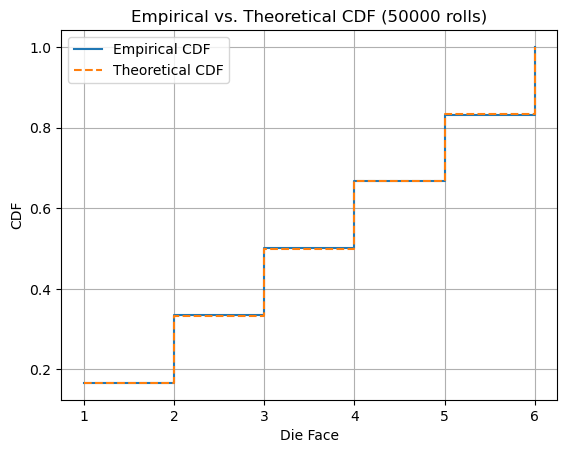

Sample Mean: 3.49612
Sample Variance: 2.9275849456


In [ ]:
# Your fancy code here
import numpy as np
import random
import matplotlib.pyplot as plt

def roll_dice(n):
    """
    Simulate rolling a die n times and plot the empirical CDF against the theoretical CDF.
    """


    faces = [1, 2, 3, 4, 5, 6]
    counts = [0] * 6

    for _ in range(n):
        r = random.randint(1, 6)
        counts[r - 1] += 1

    # Relative frequencies
    rel_freq = [c / n for c in counts]
    print(rel_freq)

    # Cumulative sum of relative frequencies
    empirical_cdf = []
    cumulative = 0
    for p in rel_freq:
        cumulative += p
        empirical_cdf.append(cumulative)

    # Plot empirical CDF
    plt.step(faces, empirical_cdf, where='post', label='Empirical CDF')

    # Theoretical CDF
    theoretical_cdf = [i / 6 for i in faces]
    plt.step(faces, theoretical_cdf, where='post', linestyle='--', label='Theoretical CDF')

    plt.xlabel("Die Face")
    plt.ylabel("CDF")
    plt.title(f"Empirical vs. Theoretical CDF ({n} rolls)")
    plt.legend()
    plt.grid(True)
    plt.show()

    sample_mean = sum((i + 1) * rel_freq[i] for i in range(6))
    sample_var = sum(pow((i + 1) - sample_mean, 2) * rel_freq[i] for i in range(6))
    print(f"Sample Mean: {sample_mean:}")
    print(f"Sample Variance: {sample_var:}")

roll_dice(50000)

## Question 2

In [29]:
#More code and comments...

## Question 3

## Question 4